In [1]:
from utils import *

## Overall Model's comparison

#### Change the root_folder and model_name to run for different models

In [2]:
# Usage
root_folder = "/Volumes/Sajid's SSD/mace_pyg" # Replace path for different model's data
model_name="mace"
combined_df, missing_csv_dirs, unreadable_csv_dirs = find_missing_csv_files_v8(root_folder, model_name)

# # Usage
# root_folder = "/Volumes/Sajid's SSD/mace_simulation_results/mace_pyg" # Replace path for different model's data
# combined_data, missing_dirs, unreadable_dirs = find_missing_csv_files_v8(root_folder, "mace")

# # Usage
# root_folder = "/Volumes/Sajid's SSD/mace_simulation_results/mace_pyg" # Replace path for different model's data
# combined_data, missing_dirs, unreadable_dirs = find_missing_csv_files_v8(root_folder, "mace")


=== Detailed Path Analysis ===
Total .cif folders found: 11
Successfully read Data.csv: 11
Missing Data.csv: 0
Unreadable Data.csv: 0


## This is just for plotting the values obtained from txt file and csv file generated

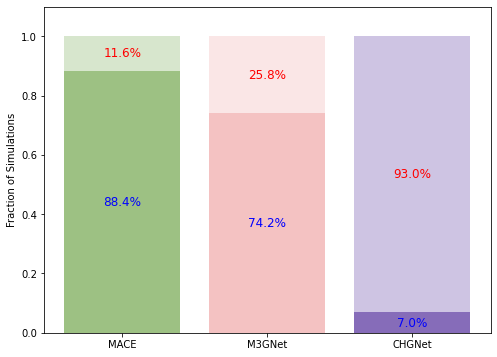

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Data
models = ['MACE', 'M3GNet', 'CHGNet']
total_folders = [2681, 2679, 2464]             ## These numbers were taken from fraction_of_completed_simulations.txt file generated from previous run.
completed_simulations = [2371, 1988, 172]

# Calculate fractions
completed_fractions = [completed / total for completed, total in zip(completed_simulations, total_folders)]

# Calculate the fraction of incomplete simulations
incomplete_fractions = [1 - completed_fraction for completed_fraction in completed_fractions]

# Colors for completed simulations
completed_colors = ['#9DC183', '#F4C2C2', '#866CB9']

# Create lighter colors for incomplete simulations by reducing alpha values
incomplete_colors = [mcolors.to_rgba(color, alpha=0.4) for color in completed_colors]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Stack bars for completed and incomplete simulations
completed_bars = ax.bar(models, completed_fractions, color=completed_colors, label='Completed Simulations')
incomplete_bars = ax.bar(models, incomplete_fractions, bottom=completed_fractions, color=incomplete_colors, label='Incomplete Simulations')

# Add percentage text labels on the bars
for i, model in enumerate(models):
    # Add text for completed simulations (green color)
    ax.text(model, completed_fractions[i] / 2, f"{completed_fractions[i]*100:.1f}%", ha='center', va='center', color='blue', fontsize=12)
    
    # Add text for incomplete simulations (red color)
    ax.text(model, completed_fractions[i] + incomplete_fractions[i] / 2, f"{incomplete_fractions[i]*100:.1f}%", ha='center', va='center', color='red', fontsize=12)

# Labels and title
ax.set_ylabel('Fraction of Simulations')
ax.set_ylim(0, 1.1)  # Set limit for y-axis
# ax.set_title('Fraction of Completed & Incomplete Simulations')

# Show plot
plt.show()


## Parity plots

#### Read the csv data generated for the different model

In [4]:
combined_data_mace=pd.read_csv("/Users/sajid/Desktop/Christ_uni/Post_processing/mace.csv")   ## Change the path to the combined data file for different models

#### Just change model name for different model and set unfiltered_parity = True to plot unfiltered data


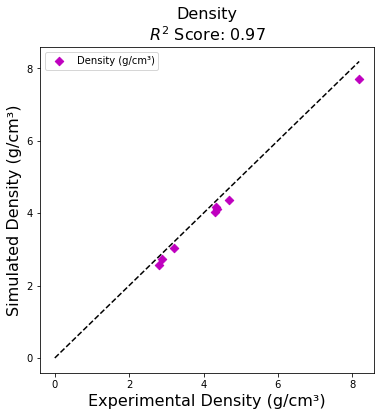

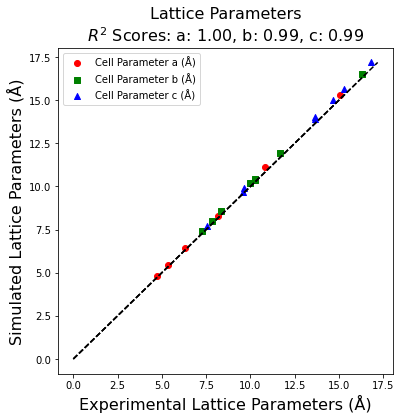

In [5]:
## Change model_name

model_name="mace"

# Create figures
fig_density, ax_density = plt.subplots(figsize=(6, 6))
fig_lattice, ax_lattice = plt.subplots(figsize=(6, 6))
# Density data
act_density = combined_data_mace['Exp_Density (g/cm³)'].values
pred_density = combined_data_mace['Sim_Density (g/cm³)'].values
act_a = combined_data_mace['Exp_a (Å)'].values
pred_a = combined_data_mace['Sim_a (Å)'].values
act_b = combined_data_mace['Exp_b (Å)'].values
pred_b = combined_data_mace['Sim_b (Å)'].values

act_c = combined_data_mace['Exp_c (Å)'].values
pred_c = combined_data_mace['Sim_c (Å)'].values


unfiltered_parity = False  # Set to True to plot unfiltered data

# Initialize dictionary to store all R2 scores
r2_scores_dict = {}

# Define marker styles
marker_density = 'D'  # Diamond
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Apply masks
mask_density = (pred_density <= 1.5 * act_density) & (pred_density >= 0.5 * act_density)
mask_a = (pred_a <= 1.5 * act_a) & (pred_a >= 0.5 * act_a)
mask_b = (pred_b <= 1.5 * act_b) & (pred_b >= 0.5 * act_b)
mask_c = (pred_c <= 1.5 * act_c) & (pred_c >= 0.5 * act_c)
mask_final = mask_density & mask_a & mask_b & mask_c

if unfiltered_parity:
    mask_final = np.ones_like(mask_final, dtype=bool)  # All True

# Plot density data
r2_density, removed_sys = plot_scatter(ax_density, mask_final, act_density, pred_density, 
                                     'Density (g/cm³)', 'm', marker_density, model_name, r2_scores_dict)

# Plot lattice parameters
r2_scores = []
for param, act, pred, color, marker in zip(['Cell Parameter a (Å)', 'Cell Parameter b (Å)', 'Cell Parameter c (Å)'],
                                         [act_a, act_b, act_c],
                                         [pred_a, pred_b, pred_c],
                                         ['r', 'g', 'b'],
                                         markers):
    r2, removed = plot_scatter(ax_lattice, mask_final, act, pred, param, 
                             color, marker, model_name, r2_scores_dict)
    r2_scores.append(r2)

# Set titles and labels
ax_density.set_title(f'Density\n$R^2$ Score: {r2_density:.2f}', fontsize=16)
ax_density.set_xlabel('Experimental Density (g/cm³)', fontsize=16)
ax_density.set_ylabel('Simulated Density (g/cm³)', fontsize=16)
ax_density.legend()

overall_r2 = f'a: {r2_scores[0]:.2f}, b: {r2_scores[1]:.2f}, c: {r2_scores[2]:.2f}' \
    if all(not np.isnan(r2) for r2 in r2_scores) else 'N/A'
ax_lattice.set_title(f'Lattice Parameters\n$R^2$ Scores: {overall_r2}', fontsize=16)
ax_lattice.set_xlabel('Experimental Lattice Parameters (Å)', fontsize=16)
ax_lattice.set_ylabel('Simulated Lattice Parameters (Å)', fontsize=16)
ax_lattice.legend(loc='upper left')

# Write all R² scores to a single file
with open(f'r2_scores_{model_name}.txt', 'w') as file:
    file.write(f"Model: {model_name}\n")
    for param, score in r2_scores_dict.items():
        file.write(f"{param} R2 Score: {score:.4f}\n")

### This is just for plotting the R2 score saved in txt file from the above run

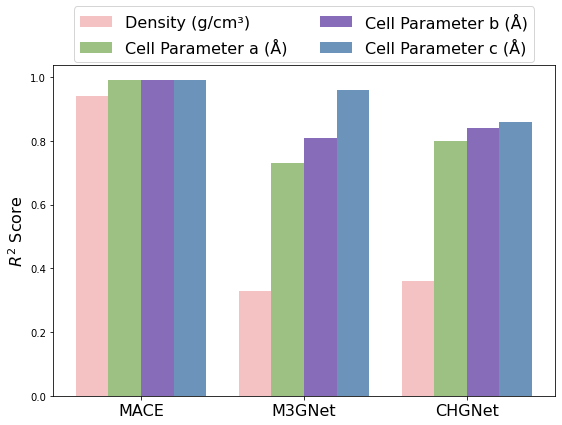

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# Example Data
models = ['MACE', 'M3GNet', 'CHGNet']  # Models (x-axis groups)
metrics = ['Density (g/cm³)', 'Cell Parameter a (Å)', 'Cell Parameter b (Å)', 'Cell Parameter c (Å)']  # Bars in each group

# R² Scores for each model and metric
data = [
    [0.94, 0.99, 0.99, 0.99],  # MACE   Get the number from txt file
    [0.33, 0.73, 0.81, 0.96],  # M3GNet
    [0.36, 0.80, 0.84, 0.86]   # CHGNet
]

# Bar settings
x = np.arange(len(models))  # Group positions
width = 0.2  # Width of each bar
colors = ['#F4C2C2', '#9DC183', '#866CB9', '#6C93B9']  # Custom colors for each metric

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each metric with custom colors
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * width, [row[i] for row in data], width, label=metric, color=color)

# Customize plot
# ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('$R^2$ Score', fontsize=16)
ax.set_xticks(x + width * 1.5)  # Adjust group position
ax.set_xticklabels(models, fontsize=16)

# Position legend over bars
ax.legend(fontsize=16, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# Add grid and display
# ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Trajectory based analysis

#### Just change the root folder name and model_name for different model

In [8]:
import csv
def main(root_folder, model_name):
    file_handler = FileHandler(root_folder)
    calculator = PropertyCalculator()

    xyz_files, log_files = file_handler.find_xyz_files()

    master_densities = []
    master_lattice_params = []
    master_temperature = []
    master_rdf_values = []
    master_time_temp_data = []

    for (system_name, xyz_file_path), (_, log_file_path) in zip(xyz_files, log_files):
        densities, lattice_params, temperature, rdf_error, time_temp_data, bond_error = process_file(
    file_handler, calculator, system_name, xyz_file_path, log_file_path)

        

        bond_error_file_name = f"bond_errors_{model_name}.txt"
        save_bond_errors_to_txt(bond_error_file_name, bond_error)
        # print(f"Bond errors saved for {system_name} in {bond_error_file_name}")

        master_densities.append(densities)
        master_lattice_params.append(lattice_params)
        master_temperature.append(temperature)
        master_rdf_values.append(rdf_error)
        master_time_temp_data.append(time_temp_data)

    save_to_csv(f'master_densities_{model_name}.csv', master_densities)
    save_to_csv(f'master_lattice_params_{model_name}.csv', master_lattice_params)
    save_to_csv(f'master_temperature_{model_name}.csv', [[temp] for temp in master_temperature])
    save_to_csv(f'master_rdf_values_{model_name}.csv', master_rdf_values)
    save_to_csv(f'master_time_temp_data_{model_name}.csv', master_time_temp_data)

    print(f"Data saved with model name '{model_name}'.")


# Example usage
if __name__ == "__main__":
    root_folder = "/Volumes/Sajid's SSD/mace"  # Replace with your root folder
    model_name = "mace"  # Replace with your model name
    main(root_folder, model_name)


Data saved with model name 'mace'.


#### Read the saved master csv file for density, rdf and plot the time progress of error

In [9]:
master_densities=pd.read_csv("/Users/sajid/Desktop/Christ_uni/Post_processing/master_densities_mace.csv")

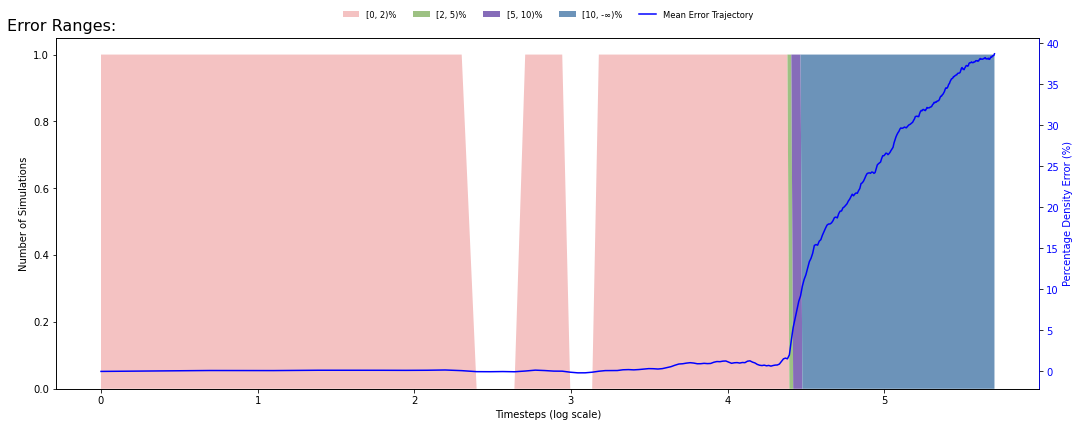

In [10]:
# Simulated data for demonstration (replace with actual data)
master_densities = np.array(master_densities)  # Replace with your actual density array

# Calculate percentage error from initial value for each trajectory
initial_densities = master_densities[:, 0:1]
percentage_errors = -1*((master_densities - initial_densities) / initial_densities) * 100

# Define error bins
error_bins = [0, 2, 5, 10, np.inf]
bin_labels = ['[0, 2)%', '[2, 5)%', '[5, 10)%', '[10, -∞)%']
colors = ['#F4C2C2', '#9DC183', '#866CB9', '#6C93B9']  # Colors for each bin

# Count trajectories in each bin at each timestep
timesteps = master_densities.shape[1]
binned_counts = np.zeros((len(bin_labels), timesteps))

for t in range(timesteps):
    bins = np.digitize(percentage_errors[:, t], error_bins[:-1])
    for i in range(len(bin_labels)):
        binned_counts[i, t] = np.sum(bins == i + 1)

# Calculate mean and standard deviation of percentage errors
mean_errors = np.mean(percentage_errors, axis=0)
std_errors = np.std(percentage_errors, axis=0)

# Define the x-axis values (timesteps)
x_values = np.arange(timesteps)

# Create the combined plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the area plot (stackplot) on the first y-axis
stack = ax1.stackplot(np.log(x_values + 1), binned_counts, labels=bin_labels, colors=colors)
ax1.set_xlabel("Timesteps (log scale)")
ax1.set_ylabel("Number of Simulations")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the mean trajectory with error fill on the second y-axis
mean_line, = ax2.plot(np.log(x_values + 1), mean_errors, label='Mean Error Trajectory', color='blue')
ax2.set_ylabel("Percentage Density Error (%)", color='blue')
# ax2.set_ylim(0, 19)  # Adjust based on the data
ax2.tick_params(axis='y', labelcolor='blue')
ax2.spines['right'].set_color('blue')

# Combine legends into one
handles, labels = ax1.get_legend_handles_labels()  # Get handles and labels from stackplot
handles.append(mean_line)  # Add the mean trajectory line
labels.append('Mean Error Trajectory')  # Add the corresponding label

# Add a single legend with appropriate size and placement
ax1.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),  # Adjusted position for combined legend
    fontsize='small',  # Set smaller font size for better fit
    frameon=False,  # Remove legend box outline for a cleaner look
    ncol=len(bin_labels) + 1  # Adjust number of columns
)

# Add "Error Range" text
plt.text(
    -0.05, 1.02,
    "Error Ranges:",
    transform=plt.gca().transAxes,
    ha='left',
    fontsize=16
)

plt.tight_layout()
plt.show()
